# Evaluation of house prices(filling/erasing gaps in datasets and interpolation in time series)

* We will use a dataset of California home values.

* Data taken from academic paper by Pace, R. Kelley and Ronald Barry, Sparse Spatial Autoregressions, Statistics and Probability Letters, 33 (1997) 291-297.

In [1]:
import pandas as pd
import numpy as np

In [2]:
cal_housing = pd.read_csv('cal_housing.csv')
cal_housing

,longitude,latitude,housingMedianAge,totalRooms,totalBedrooms,population,households,medianIncome,medianHouseValue
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0


* This data is complete, there are no gaps.

* Unfortunately this is not the rule.

* Most of the time there are gaps in the data available to us.

* When a record contains a space instead of a real number, the space is represented as `NaN` (Not a Number).

* So we here degrade the quality of our data by introducing gaps in it.

* We will impute blanks in 75% of the rows of the `DataFrame` (method comes from the [scikit-learn documentation](https://scikit-learn.org/stable/auto_examples/impute/plot_missing_values.html)).

In [3]:
n_samples, n_features = cal_housing.shape

# Add missing values in 75% of the lines
missing_rate = 0.75
n_missing_samples = int(n_samples * missing_rate)
n_missing_samples

15480

* We make an array with as many elements as the rows of `cal_housing` `DataFrame`, with `False` values.

In [4]:
missing_samples = np.zeros(n_samples, dtype=bool)
print(missing_samples.shape, missing_samples)

(20640,) [False False False ... False False False]


* We'll make the first 75% of its elements equal to `True'.

In [5]:
missing_samples[:n_missing_samples] = True

* Shuffle the elements of the table so that `True` and `False` are scattered.

In [6]:
rng = np.random.default_rng(42)
rng.shuffle(missing_samples)

* For each of the lines in which we will insert a space, we randomly select a column whose contents we will erase.

In [7]:
missing_features = rng.integers(0, n_features, n_missing_samples)
print(missing_features.shape, missing_features)

(15480,) [4 3 1 ... 7 2 1]


* We change the values ​​of `cal_housing`, putting `np.nan` in the selected rows and columns.

In [8]:
cal_housing.values[missing_samples, missing_features] = np.nan
cal_housing

,longitude,latitude,housingMedianAge,totalRooms,totalBedrooms,population,households,medianIncome,medianHouseValue
0,-122.23,37.88,41.0,880.0,NaN,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,NaN,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,NaN,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,NaN,5.6431,341300.0
4,NaN,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0
...,...,...,...,...,...,...,...,...,...
20635,NaN,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0
20636,-121.21,39.49,18.0,NaN,150.0,356.0,114.0,2.5568,77100.0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,NaN,92300.0
20638,-121.32,39.43,NaN,1860.0,409.0,741.0,349.0,1.8672,84700.0


* The main thing we can do when we have gaps is to establish the existence of non-existence.

* If we want pandas to check if a value does not exist, we can use the `isna()` method.

In [9]:
cal_housing['totalRooms'].isna()

0        False
1         True
2        False
3        False
4        False
         ...  
20635    False
20636     True
20637    False
20638    False
20639    False
Name: totalRooms, Length: 20640, dtype: bool

* A synonym of the `isna()` method is the `isnull()` method.

In [10]:
cal_housing['totalRooms'].isnull()

0        False
1         True
2        False
3        False
4        False
         ...  
20635    False
20636     True
20637    False
20638    False
20639    False
Name: totalRooms, Length: 20640, dtype: bool

* Conversely, if we want to check that a value exists, we can use the `notna()` method.

In [11]:
cal_housing['latitude'].notna()

0         True
1         True
2        False
3         True
4         True
         ...  
20635     True
20636     True
20637     True
20638     True
20639    False
Name: latitude, Length: 20640, dtype: bool

* Synonymous with `notna()` is the `notnull()` method.

In [12]:
cal_housing['latitude'].notnull()

0         True
1         True
2        False
3         True
4         True
         ...  
20635     True
20636     True
20637     True
20638     True
20639    False
Name: latitude, Length: 20640, dtype: bool

* If we want to count how many spaces there are, we can sum the result of `isna()`, since in the sum `True` values ​​become 1 and `False` values ​​become 0.

In [13]:
cal_housing['latitude'].isna().sum()

1680

* Based on these methods we can filter our data so that we don't have gaps.

In [14]:
cal_housing[cal_housing['medianHouseValue'].notna()]

,longitude,latitude,housingMedianAge,totalRooms,totalBedrooms,population,households,medianIncome,medianHouseValue
0,-122.23,37.88,41.0,880.0,NaN,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,NaN,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,NaN,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,NaN,5.6431,341300.0
4,NaN,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0
...,...,...,...,...,...,...,...,...,...
20635,NaN,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0
20636,-121.21,39.49,18.0,NaN,150.0,356.0,114.0,2.5568,77100.0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,NaN,92300.0
20638,-121.32,39.43,NaN,1860.0,409.0,741.0,349.0,1.8672,84700.0


* Another solution is to drop the lines (entries) where there are spaces using the `dropna()` method.

In [15]:
cal_housing.dropna()

,longitude,latitude,housingMedianAge,totalRooms,totalBedrooms,population,households,medianIncome,medianHouseValue
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0
11,-122.26,37.85,52.0,3503.0,752.0,1504.0,734.0,3.2705,241800.0
17,-122.27,37.85,52.0,1228.0,293.0,648.0,303.0,2.1202,155500.0
20,-122.27,37.85,40.0,751.0,184.0,409.0,166.0,1.3578,147500.0
21,-122.27,37.85,42.0,1639.0,367.0,929.0,366.0,1.7135,159800.0
...,...,...,...,...,...,...,...,...,...
20617,-121.53,39.06,20.0,561.0,109.0,308.0,114.0,3.3021,70800.0
20620,-121.48,39.05,40.0,198.0,41.0,151.0,48.0,4.5625,100000.0
20623,-121.37,39.03,32.0,1158.0,244.0,598.0,227.0,2.8235,65500.0
20627,-121.32,39.13,5.0,358.0,65.0,169.0,59.0,3.0000,162500.0


* The problem is that such an approach can be overwhelming because we lose a large amount of our data.

* We may eventually wish to remove lines where there are spaces only in certain columns.

In [16]:
cal_housing.dropna(subset=['medianHouseValue', 'medianIncome'])

,longitude,latitude,housingMedianAge,totalRooms,totalBedrooms,population,households,medianIncome,medianHouseValue
0,-122.23,37.88,41.0,880.0,NaN,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,NaN,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,NaN,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,NaN,5.6431,341300.0
4,NaN,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0
...,...,...,...,...,...,...,...,...,...
20633,-121.53,39.19,27.0,2080.0,412.0,1082.0,NaN,2.5495,98300.0
20635,NaN,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0
20636,-121.21,39.49,18.0,NaN,150.0,356.0,114.0,2.5568,77100.0
20638,-121.32,39.43,NaN,1860.0,409.0,741.0,349.0,1.8672,84700.0


* If we don't want to throw away data, we can mutate our data, giving a default value where there are spaces, with the `fillna()` method.

In [17]:
cal_housing.fillna(0)

,longitude,latitude,housingMedianAge,totalRooms,totalBedrooms,population,households,medianIncome,medianHouseValue
0,-122.23,37.88,41.0,880.0,0.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,0.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,0.00,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,0.0,5.6431,341300.0
4,0.00,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0
...,...,...,...,...,...,...,...,...,...
20635,0.00,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0
20636,-121.21,39.49,18.0,0.0,150.0,356.0,114.0,2.5568,77100.0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,0.0000,92300.0
20638,-121.32,39.43,0.0,1860.0,409.0,741.0,349.0,1.8672,84700.0


* If we still don't want to insert the default value everywhere, we can select the subset of columns in which to use it.

In [18]:
cal_housing[['medianIncome', 'medianHouseValue']].fillna(0)

,medianIncome,medianHouseValue
0,8.3252,452600.0
1,8.3014,358500.0
2,7.2574,352100.0
3,5.6431,341300.0
4,3.8462,342200.0
...,...,...
20635,1.5603,78100.0
20636,2.5568,77100.0
20637,0.0000,92300.0
20638,1.8672,84700.0


* Maybe filling in the blanks can be done a bit more intelligently.

* For example, instead of a predetermined value to use the average, or more generally values ​​that will result from calculations.

In [19]:
cal_housing.fillna(cal_housing.mean())

,longitude,latitude,housingMedianAge,totalRooms,totalBedrooms,population,households,medianIncome,medianHouseValue
0,-122.230000,37.880000,41.000000,880.000000,539.232767,322.0,126.000,8.325200,452600.0
1,-122.220000,37.860000,21.000000,2641.457729,1106.000000,2401.0,1138.000,8.301400,358500.0
2,-122.240000,35.625127,52.000000,1467.000000,190.000000,496.0,177.000,7.257400,352100.0
3,-122.250000,37.850000,52.000000,1274.000000,235.000000,558.0,499.158,5.643100,341300.0
4,-119.574345,37.850000,52.000000,1627.000000,280.000000,565.0,259.000,3.846200,342200.0
...,...,...,...,...,...,...,...,...,...
20635,-119.574345,39.480000,25.000000,1665.000000,374.000000,845.0,330.000,1.560300,78100.0
20636,-121.210000,39.490000,18.000000,2641.457729,150.000000,356.0,114.000,2.556800,77100.0
20637,-121.220000,39.430000,17.000000,2254.000000,485.000000,1007.0,433.000,3.870723,92300.0
20638,-121.320000,39.430000,28.662049,1860.000000,409.000000,741.0,349.000,1.867200,84700.0


* If we don't want to apply it to the whole `DataFrame`, we can still select subset of columns.

In [20]:
cal_housing.fillna(cal_housing.mean()["medianIncome":"medianHouseValue"])

,longitude,latitude,housingMedianAge,totalRooms,totalBedrooms,population,households,medianIncome,medianHouseValue
0,-122.23,37.88,41.0,880.0,NaN,322.0,126.0,8.325200,452600.0
1,-122.22,37.86,21.0,NaN,1106.0,2401.0,1138.0,8.301400,358500.0
2,-122.24,NaN,52.0,1467.0,190.0,496.0,177.0,7.257400,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,NaN,5.643100,341300.0
4,NaN,37.85,52.0,1627.0,280.0,565.0,259.0,3.846200,342200.0
...,...,...,...,...,...,...,...,...,...
20635,NaN,39.48,25.0,1665.0,374.0,845.0,330.0,1.560300,78100.0
20636,-121.21,39.49,18.0,NaN,150.0,356.0,114.0,2.556800,77100.0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,3.870723,92300.0
20638,-121.32,39.43,NaN,1860.0,409.0,741.0,349.0,1.867200,84700.0


* With the `fillna()` method we can use other strategies for handling gaps.

* It is more convenient to see them with another, smaller and artificial `DataFrame`.

In [21]:
df = pd.DataFrame(
    np.random.randn(5, 3),
    columns=["a", "b", "c"],
)
df

,a,b,c
0,0.664319,-1.323232,0.585482
1,0.098835,0.225479,0.859195
2,-0.246654,-0.156775,-0.244600
3,-0.348405,-1.791612,-0.500346
4,-1.260509,0.851701,1.177573


* We will insert spaces by making a mask of `NaN' values.

In [22]:
np.random.seed(0)
nan_mask = np.where(np.random.randint(low=0, high=1+1, size=(5,3)) == 1, 0, np.nan)
nan_mask

array([[nan,  0.,  0.],
       [nan,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0., nan],
       [nan,  0., nan]])

* We add the mask to our `DataFrame`.

* By chance we also see a basic characteristic of non-existence: non-existence spreads.

* Operations with non-existent data give non-existent results (unless the documentation says otherwise).

In [23]:
df

,a,b,c
0,0.664319,-1.323232,0.585482
1,0.098835,0.225479,0.859195
2,-0.246654,-0.156775,-0.244600
3,-0.348405,-1.791612,-0.500346
4,-1.260509,0.851701,1.177573


In [24]:
df = df + nan_mask
df

,a,b,c
0,NaN,-1.323232,0.585482
1,NaN,0.225479,0.859195
2,-0.246654,-0.156775,-0.244600
3,-0.348405,-1.791612,NaN
4,NaN,0.851701,NaN


* Let us confirm again what we said before, that non-existence is contagious.

In [25]:
df

,a,b,c
0,NaN,-1.323232,0.585482
1,NaN,0.225479,0.859195
2,-0.246654,-0.156775,-0.244600
3,-0.348405,-1.791612,NaN
4,NaN,0.851701,NaN


In [26]:
df.a + df.b

0         NaN
1         NaN
2   -0.403429
3   -2.140017
4         NaN
dtype: float64

* Giving `fillna(method='pad')` the gap is filled with the value on the previous line.

In [27]:
df

,a,b,c
0,NaN,-1.323232,0.585482
1,NaN,0.225479,0.859195
2,-0.246654,-0.156775,-0.244600
3,-0.348405,-1.791612,NaN
4,NaN,0.851701,NaN


In [28]:
df.fillna(method='pad')

,a,b,c
0,NaN,-1.323232,0.585482
1,NaN,0.225479,0.859195
2,-0.246654,-0.156775,-0.244600
3,-0.348405,-1.791612,-0.244600
4,-0.348405,0.851701,-0.244600


* We can do the same by giving `fillna(method='ffill')` (forward fill).

In [29]:
df

,a,b,c
0,NaN,-1.323232,0.585482
1,NaN,0.225479,0.859195
2,-0.246654,-0.156775,-0.244600
3,-0.348405,-1.791612,NaN
4,NaN,0.851701,NaN


In [30]:
df.fillna(method='ffill')

,a,b,c
0,NaN,-1.323232,0.585482
1,NaN,0.225479,0.859195
2,-0.246654,-0.156775,-0.244600
3,-0.348405,-1.791612,-0.244600
4,-0.348405,0.851701,-0.244600


* If we want to fill in reverse, i.e. the space is filled by the value of the next line, we use `fillna(method='bfill')` (backfill).

In [31]:
df

,a,b,c
0,NaN,-1.323232,0.585482
1,NaN,0.225479,0.859195
2,-0.246654,-0.156775,-0.244600
3,-0.348405,-1.791612,NaN
4,NaN,0.851701,NaN


In [32]:
df.fillna(method='bfill')

,a,b,c
0,-0.246654,-1.323232,0.585482
1,-0.246654,0.225479,0.859195
2,-0.246654,-0.156775,-0.244600
3,-0.348405,-1.791612,NaN
4,NaN,0.851701,NaN


* We can do the same by giving `fillna(method='backfill')`.

In [33]:
df

,a,b,c
0,NaN,-1.323232,0.585482
1,NaN,0.225479,0.859195
2,-0.246654,-0.156775,-0.244600
3,-0.348405,-1.791612,NaN
4,NaN,0.851701,NaN


In [34]:
df.fillna(method='backfill')

,a,b,c
0,-0.246654,-1.323232,0.585482
1,-0.246654,0.225479,0.859195
2,-0.246654,-0.156775,-0.244600
3,-0.348405,-1.791612,NaN
4,NaN,0.851701,NaN


* Another way to handle missing values ​​is with *interpolation*.

* This can be particularly useful in cases where the values ​​have a continuum, such as in *time series*.

* pandas supports various interpolation methods. Here we will see the simplest, the *linear interpolation* (linear interpolation).

* To see interference in action, we will generate some synthetic data that will simulate a *random walk*.

In [35]:
steps = np.random.randint(-1, 1+1, size=365)
data = steps.cumsum()

ts = pd.Series(data=data,
               index=pd.date_range(start='2021-01-01', end='2021-12-31', freq='D'))
ts

2021-01-01    -1
2021-01-02    -2
2021-01-03    -3
2021-01-04    -2
2021-01-05    -2
              ..
2021-12-27   -15
2021-12-28   -14
2021-12-29   -15
2021-12-30   -14
2021-12-31   -15
Freq: D, Length: 365, dtype: int64

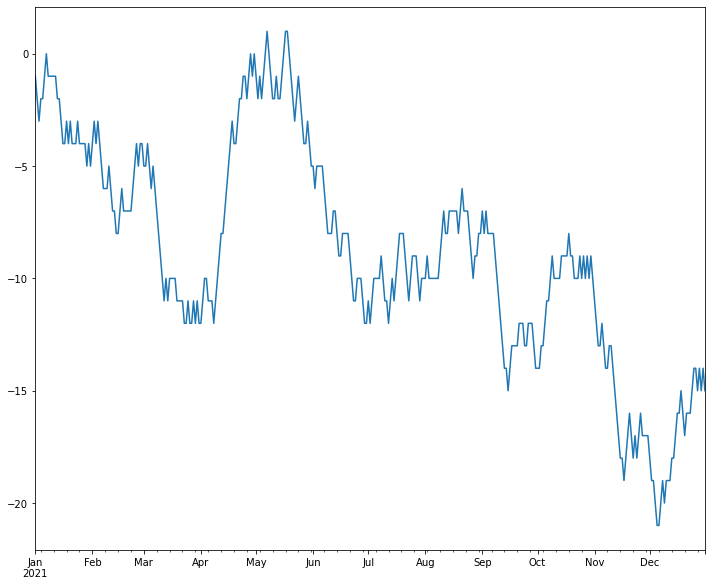

In [36]:
_ = ts.plot(figsize=(12, 10))

* We will again randomly delete some of the data (about half).

In [37]:
nan_mask = np.where(np.random.randint(low=0, high=1+1, size=(365)) == 1, 0, np.nan)
ts = ts + nan_mask
print(ts.isna().sum())
ts

179


2021-01-01    -1.0
2021-01-02     NaN
2021-01-03    -3.0
2021-01-04     NaN
2021-01-05    -2.0
              ... 
2021-12-27     NaN
2021-12-28     NaN
2021-12-29   -15.0
2021-12-30     NaN
2021-12-31     NaN
Freq: D, Length: 365, dtype: float64

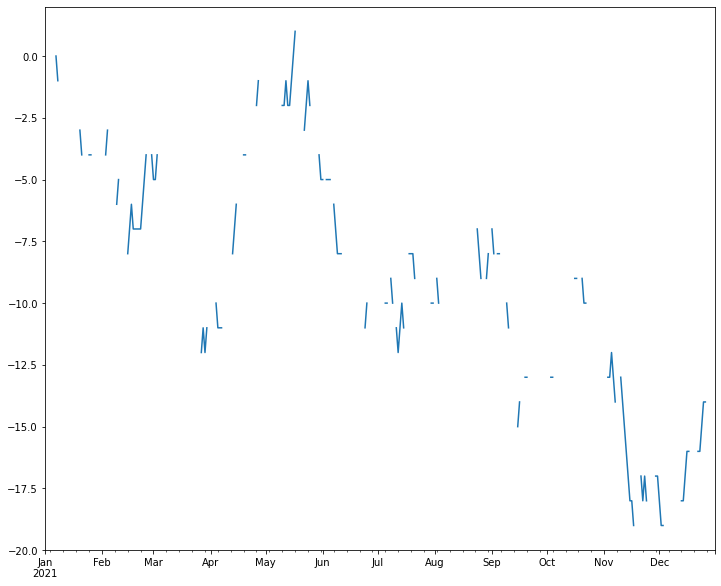

In [38]:
_ = ts.plot(figsize=(12, 10))

* This is what we get if we use linear interpolation with the `interpolate()` method.

In [39]:
ts = ts.interpolate()
ts

2021-01-01    -1.000000
2021-01-02    -2.000000
2021-01-03    -3.000000
2021-01-04    -2.500000
2021-01-05    -2.000000
                ...    
2021-12-27   -14.333333
2021-12-28   -14.666667
2021-12-29   -15.000000
2021-12-30   -15.000000
2021-12-31   -15.000000
Freq: D, Length: 365, dtype: float64

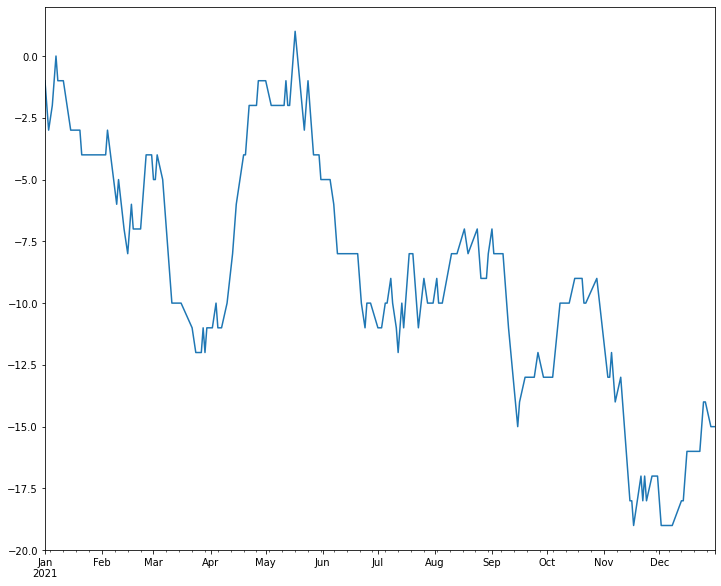

In [40]:
_ = ts.plot(figsize=(12, 10))

* Additional strategies for handling data with gaps are provided by the [scikit-learn](https://scikit-learn.org/stable/) library, via imputation mechanisms.

* The simplest of these are given by the `SimpleImputer` class, which offers the alternatives:

 * `mean`

 * `median`

 * `most_frequent'

 * `constant'

In [41]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values=np.nan, strategy="constant", fill_value=0)

* Back to the data from California:

In [42]:
cal_housing

,longitude,latitude,housingMedianAge,totalRooms,totalBedrooms,population,households,medianIncome,medianHouseValue
0,-122.23,37.88,41.0,880.0,NaN,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,NaN,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,NaN,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,NaN,5.6431,341300.0
4,NaN,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0
...,...,...,...,...,...,...,...,...,...
20635,NaN,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0
20636,-121.21,39.49,18.0,NaN,150.0,356.0,114.0,2.5568,77100.0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,NaN,92300.0
20638,-121.32,39.43,NaN,1860.0,409.0,741.0,349.0,1.8672,84700.0


* To use a scikit-learn enumerator our data must be in the form of a 2D array.

* We can do this by calling `reshape(-1, 1)` which means "reshape the data into one column and as many rows as needed".

In [43]:
cal_housing['totalBedrooms'].values.reshape(-1, 1)

array([[  nan],
       [1106.],
       [ 190.],
       ...,
       [ 485.],
       [ 409.],
       [ 616.]])

* We call the `fit_transform()` method of our enumerator:

In [44]:
imputer.fit_transform(cal_housing['totalBedrooms'].values.reshape(-1, 1))

array([[   0.],
       [1106.],
       [ 190.],
       ...,
       [ 485.],
       [ 409.],
       [ 616.]])

* Instead of entering a fixed value, let's put the median.

* We will also ask, by giving `add_indicator=True', to return an additional column with values ​​0 and 1, where the value 1 means that the enumerator entered the value in this line.

In [45]:
imputer = SimpleImputer(missing_values=np.nan, strategy="median", add_indicator=True)
imputer.fit_transform(cal_housing['totalBedrooms'].values.reshape(-1, 1))

array([[4.350e+02, 1.000e+00],
       [1.106e+03, 0.000e+00],
       [1.900e+02, 0.000e+00],
       ...,
       [4.850e+02, 0.000e+00],
       [4.090e+02, 0.000e+00],
       [6.160e+02, 0.000e+00]])

* scikit-learn also offers other enumerators:

 * `KNNComputer`

 * `IterativeImputer`

* The most difficult point in managing gaps is not the technical part.

* We see that there are tools with which we can handle them.

* The most difficult point is the operational one. Do we want to delete data, or fill in the blanks? If we want to fill in the blanks, what values ​​does it make sense to fill them in?

* If reality has gaps, we must be sure that by filling them we do not falsify reality.